In [19]:
import ipywidgets as widgets
from IPython.display import display

policies_mapping = {
    'stochastic': [
        '/misc/vlgscratch4/LecunGroup/nvidia-collab/models_v12/',
        'MPUR-policy-gauss-model=vae-zdropout=0.5-policy-gauss-nfeature=256-bsize=6-npred=30-ureg=0.05-lambdal=0.2-lambdaa=0.0-gamma=0.99-lrtz=0.0-updatez=0-inferz=0-learnedcost=1',
    ],
        
    'Deterministic policy, regressed cost': [
        '/misc/vlgscratch4/LecunGroup/nvidia-collab/models_v12/',
        'MPUR-policy-deterministic-model=vae-zdropout=0.5-nfeature=256-bsize=6-npred=30-ureg=0.05-lambdal=0.2-lambdaa=0.0-gamma=0.99-lrtz=0.0-updatez=0-inferz=0-learnedcost=1',
    ],
    'Non-regressed cost' : [
        '/misc/vlgscratch4/LecunGroup/nvidia-collab/models_v13/',
        'MPUR-policy-deterministic-model=vae-zdropout=0.5-nfeature=256-bsize=6-npred=30-ureg=0.05-lambdal=0.2-lambdaa=0.0-gamma=0.99-lrtz=0.0-updatez=0-inferz=0-learnedcost=False',
    ],
}

In [20]:
select = widgets.SelectMultiple(
    options=list(policies_mapping.keys()),
    rows=10,
    description='Experiments',
    disabled=False,
    layout=widgets.Layout(width='500px',border='solid'),
    value=['stochastic']
)
seed_dropdown = widgets.Dropdown(
    description='Seed:',
    disabled=False,
)
checkpoint_dropdown = widgets.Dropdown(
    description='Checkpoint:',
    disabled=False,
)
episode_dropdown = widgets.Dropdown(
    description='Episode:',
    disabled=False,
)

In [21]:
from glob import glob
import re

def find_option_values(option=None, option_arg=0 ):
#     ipdb.set_trace()
    if option == 'seed':
        path = policies_mapping[select.value[0]]
        logs = glob(path[0] + 'policy_networks/' + path[1] + '*.log')
        regexp = r"seed=(\d+)-"
    elif option == 'checkpoint':
        path = policies_mapping[select.value[0]]
        logs = glob(path[0] + 'planning_results/' + path[1] + f'-seed={seed_dropdown.value}' + '*.model.log')
        regexp = r'-novaluestep(\d+)\.'
    elif option == 'episode':
        path = policies_mapping[select.value[0]]
        logs = glob(path[0] + 'planning_results/videos_simulator/' + path[1] + f'-seed={seed_dropdown.value}-novaluestep{checkpoint_dropdown.value}.model/ep*')
        regexp = r'model/ep(\d+)'
        
    values = []

    for log in logs:
        m = re.search(regexp, log)
        result = m.group(1)
        values.append(int(result))

    values.sort()
    
    return values

# seeds = find_option_values(select, 'seed')

In [22]:
def update_seeds(change):
    seed_dropdown.options = find_option_values('seed')
def update_checkpoints(change):
    checkpoint_dropdown.options = find_option_values('checkpoint')
def update_episodes(change):
    episode_dropdown.options = find_option_values('episode')

In [23]:
select.observe(update_seeds,type='change')
seed_dropdown.observe(update_checkpoints,type='change')
checkpoint_dropdown.observe(update_episodes,type='change')

In [24]:
import torch
import matplotlib.pyplot as plt


In [25]:
def plot_episode_state(episode):
    print(episode)
    if episode_dropdown.value is not None:
        path = policies_mapping[select.value[0]]
        states_paths = glob(path[0] + 'planning_results/' + path[1] + f'-seed={seed_dropdown.value}-novaluestep{checkpoint_dropdown.value}' + '.model.states')
        print(len(states_paths))
        assert(len(states_paths) == 1)
        states_path = states_paths[0]
        states = torch.load(states_path)

        print('value is ', episode_dropdown.value)
        print('states len is', len(states))
        episode_states = states[episode_dropdown.value - 1]

        episode_states = list(map(lambda x : x[-1], episode_states))

        episode_states = torch.stack(episode_states)

        episode_states[:, 2:].norm(dim=1)

        plt.plot(episode_states[:, 2:].norm(dim=1))
        plt.show()
    


In [26]:
episode_dropdown.observe(plot_episode_state,type='change')

SelectMultiple(description='Experiments', index=(0,), layout=Layout(border='solid', width='500px'), options=('…

Dropdown(description='Seed:', options=(), value=None)

Dropdown(description='Checkpoint:', options=(), value=None)

Dropdown(description='Episode:', options=(), value=None)

{'name': '_options_labels', 'old': (), 'new': ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152

value is  1
states len is 560


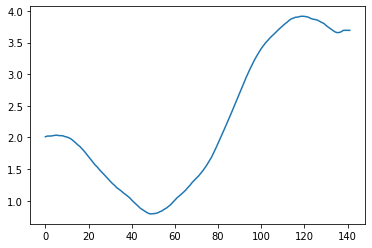

{'name': 'index', 'old': None, 'new': 0, 'owner': Dropdown(description='Episode:', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 2

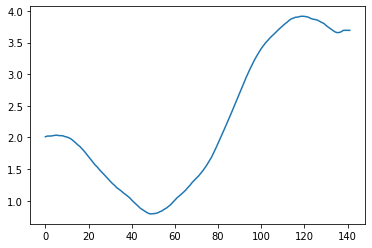

{'name': 'options', 'old': (), 'new': (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214,

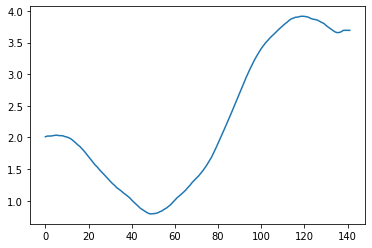

{'name': '_options_labels', 'old': ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '

AssertionError: 

In [27]:
display(select)
display(seed_dropdown)
display(checkpoint_dropdown)
display(episode_dropdown)